# Demo 2 AI-prog

In [1]:
import sys
!{sys.executable} -m pip install --upgrade git+https://github.com/AndersBjelland/IT3105_Project2.git@dev

  Cloning https://github.com/AndersBjelland/IT3105_Project2.git (to revision dev) to /private/var/folders/dm/8497wlxs7d34zt6c6wdjfh500000gn/T/pip-req-build-s5cv9bca
  Created wheel for Project2: filename=Project2-1.0-py3-none-any.whl size=14953 sha256=5e13453c5dbe26f594f07e36df72b20b893ab32b59ca00c39c703285589132a0
  Stored in directory: /private/var/folders/dm/8497wlxs7d34zt6c6wdjfh500000gn/T/pip-ephem-wheel-cache-ppbz0ass/wheels/b2/24/99/8fa89aec957ae3920f431ef10ca7ed9e2e3743c4e806a2fbf0
Successfully built Project2
  Attempting uninstall: Project2
    Found existing installation: Project2 1.0
    Uninstalling Project2-1.0:
      Successfully uninstalled Project2-1.0


In [1]:
import matplotlib.pyplot as plt

In [2]:
# our code
from src import *

alpha zero ran 800 simulations in mcts

## Train a simple agent and show improvement

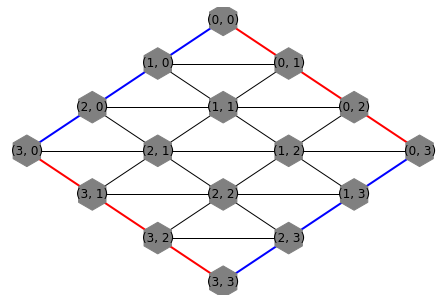

In [3]:
%matplotlib inline
hex = Hex((4,4))
hex.display_board()

In [4]:
hex = Hex((4,4))

encoder = DemoEncoder(padding=0)

actor = Actor(learning_rate=0.001,
             epsilon=0.25,
             end_epsilon=0.05,
             nn_shape=(32,128,16),
             filters=(),
             kernel_sizes=(),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='softmax',
              nn_loss= 'categorical_crossentropy',
              encoder=encoder
             )
hex.set_encoder(encoder)            
            
agent = Agent(actor)  
mcts = MCTS(agent.actor, hex)

In [16]:
feat = hex.encoder.get_encoding()
actor.model(feat)

<tf.Tensor: shape=(1, 16), dtype=float32, numpy=
array([[1.4926128e-03, 9.7755787e-05, 7.3293817e-01, 8.7997701e-05,
        1.7485085e-03, 9.0498507e-02, 6.2929176e-02, 2.7391460e-04,
        3.3903014e-04, 9.5150426e-06, 3.6829095e-02, 4.0763564e-02,
        5.7314493e-04, 1.1288967e-03, 2.5188250e-03, 2.7771229e-02]],
      dtype=float32)>

In [15]:
import tensorflow as tf
feat = tf.concat([hex.encoder.get_encoding() for i in range(100)], 0)
actor.model(feat)

<tf.Tensor: shape=(100, 16), dtype=float32, numpy=
array([[1.4926140e-03, 9.7755772e-05, 7.3293805e-01, ..., 1.1288965e-03,
        2.5188259e-03, 2.7771223e-02],
       [1.4926140e-03, 9.7755772e-05, 7.3293805e-01, ..., 1.1288965e-03,
        2.5188259e-03, 2.7771223e-02],
       [1.4926140e-03, 9.7755772e-05, 7.3293805e-01, ..., 1.1288965e-03,
        2.5188259e-03, 2.7771223e-02],
       ...,
       [1.4926140e-03, 9.7755772e-05, 7.3293805e-01, ..., 1.1288965e-03,
        2.5188259e-03, 2.7771223e-02],
       [1.4926140e-03, 9.7755772e-05, 7.3293805e-01, ..., 1.1288965e-03,
        2.5188259e-03, 2.7771223e-02],
       [1.4926140e-03, 9.7755772e-05, 7.3293805e-01, ..., 1.1288965e-03,
        2.5188259e-03, 2.7771223e-02]], dtype=float32)>

In [5]:
%time mcts.search(100)

CPU times: user 1.6 s, sys: 27.1 ms, total: 1.63 s
Wall time: 1.72 s


{(2, 2): 0.02,
 (2, 3): 0.06,
 (0, 3): 0.35000000000000003,
 (3, 1): 0.08,
 (0, 1): 0.04,
 (2, 0): 0.02,
 (3, 0): 0.02,
 (3, 2): 0.02,
 (2, 1): 0.02,
 (1, 0): 0.02,
 (0, 0): 0.08,
 (3, 3): 0.08,
 (1, 1): 0.08,
 (1, 2): 0.02,
 (1, 3): 0.08,
 (0, 2): 0.01}

In [6]:
agent.train_agent(hex, n_episodes=40, n_simulations=100, epochs=10, M=4, file_path='models/updateEnc')

  0%|          | 0/40 [00:00<?, ?it/s]

Epoch 1/10
1/1 [==============================] - 1s 540ms/step - loss: 2.7898 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 2.7603 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 2.7320 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 2.7049 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 2.6783 - accuracy: 0.0909
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 2.6524 - accuracy: 0.1818
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 2.6271 - accuracy: 0.1818
Epoch 8/10
1/1 [==============================] - 0s 24ms/step - loss: 2.6021 - accuracy: 0.2727
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 2.5774 - accuracy: 0.2727
Epoch 10/10
1/1 [==============================] - 0s 15ms/step - loss: 2.5527 - accuracy: 0.2727


  2%|▎         | 1/40 [00:09<06:06,  9.39s/it]

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 2.7104 - accuracy: 0.1364
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 2.6966 - accuracy: 0.1818
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 2.6818 - accuracy: 0.1818
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 2.6664 - accuracy: 0.1818
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 2.6507 - accuracy: 0.1818
Epoch 6/10
1/1 [==============================] - 0s 16ms/step - loss: 2.6347 - accuracy: 0.1818
Epoch 7/10
1/1 [==============================] - 0s 12ms/step - loss: 2.6186 - accuracy: 0.1818
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 2.6025 - accuracy: 0.1818
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 2.5864 - accuracy: 0.1818
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 2.5704 - accuracy: 0.1818


  5%|▌         | 2/40 [00:18<05:49,  9.19s/it]

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 2.6655 - accuracy: 0.1316
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 2.6536 - accuracy: 0.1316
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 2.6396 - accuracy: 0.1316
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 2.6242 - accuracy: 0.1316
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 2.6077 - accuracy: 0.1316
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 2.5907 - accuracy: 0.1316
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 2.5734 - accuracy: 0.1316
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 2.5560 - accuracy: 0.1316
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 2.5391 - accuracy: 0.1316
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 2.5229 - accuracy: 0.1842


  8%|▊         | 3/40 [00:25<05:25,  8.78s/it]

Epoch 1/10
1/1 [==============================] - 0s 4ms/step - loss: 2.5844 - accuracy: 0.1875
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 2.5724 - accuracy: 0.1875
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 2.5608 - accuracy: 0.2083
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 2.5497 - accuracy: 0.2083
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 2.5391 - accuracy: 0.2292
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 2.5289 - accuracy: 0.2500
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 2.5190 - accuracy: 0.2708
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 2.5094 - accuracy: 0.2917
Epoch 9/10
1/1 [==============================] - 0s 10ms/step - loss: 2.5002 - accuracy: 0.3333
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 2.4911 - accuracy: 0.3333


 10%|█         | 4/40 [00:33<05:02,  8.40s/it]

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 2.5214 - accuracy: 0.3036
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 2.5137 - accuracy: 0.2857
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 2.5062 - accuracy: 0.3036
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 2.4987 - accuracy: 0.3036
Epoch 5/10
1/1 [==============================] - 0s 19ms/step - loss: 2.4911 - accuracy: 0.3036
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 2.4834 - accuracy: 0.3036
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 2.4758 - accuracy: 0.3393
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 2.4680 - accuracy: 0.3393
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 2.4602 - accuracy: 0.3393
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 2.4522 - accuracy: 0.3393


 12%|█▎        | 5/40 [00:40<04:34,  7.85s/it]

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 2.4703 - accuracy: 0.3175
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 2.4628 - accuracy: 0.3175
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 2.4553 - accuracy: 0.3492
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 2.4478 - accuracy: 0.3492
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 2.4403 - accuracy: 0.3651
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 2.4327 - accuracy: 0.3968
Epoch 7/10
1/1 [==============================] - 0s 15ms/step - loss: 2.4251 - accuracy: 0.4127
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 2.4174 - accuracy: 0.4286
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 2.4097 - accuracy: 0.4603
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 2.4021 - accuracy: 0.4762


 15%|█▌        | 6/40 [00:45<03:58,  7.02s/it]

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 2.4634 - accuracy: 0.4459
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 2.4567 - accuracy: 0.4595
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 2.4498 - accuracy: 0.4459
Epoch 4/10
1/1 [==============================] - 0s 11ms/step - loss: 2.4428 - accuracy: 0.4324
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 2.4356 - accuracy: 0.4324
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 2.4284 - accuracy: 0.4189
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 2.4212 - accuracy: 0.4189
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 2.4139 - accuracy: 0.4054
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 2.4068 - accuracy: 0.4189
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 2.3998 - accuracy: 0.4189


 18%|█▊        | 7/40 [00:52<03:52,  7.05s/it]

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 2.4605 - accuracy: 0.3721
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 2.4540 - accuracy: 0.3721
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 2.4470 - accuracy: 0.3721
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 2.4397 - accuracy: 0.3837
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 2.4322 - accuracy: 0.3721
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 2.4244 - accuracy: 0.3721
Epoch 7/10
1/1 [==============================] - 0s 15ms/step - loss: 2.4166 - accuracy: 0.3721
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 2.4088 - accuracy: 0.3721
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 2.4009 - accuracy: 0.3605
Epoch 10/10
1/1 [==============================] - 0s 10ms/step - loss: 2.3932 - accuracy: 0.3605


 20%|██        | 8/40 [01:01<04:09,  7.81s/it]

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 2.4229 - accuracy: 0.3232
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 2.4163 - accuracy: 0.3434
Epoch 3/10
1/1 [==============================] - 0s 12ms/step - loss: 2.4096 - accuracy: 0.3434
Epoch 4/10
1/1 [==============================] - 0s 18ms/step - loss: 2.4028 - accuracy: 0.3535
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 2.3959 - accuracy: 0.3535
Epoch 6/10
1/1 [==============================] - 0s 29ms/step - loss: 2.3891 - accuracy: 0.3636
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 2.3823 - accuracy: 0.3838
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 2.3756 - accuracy: 0.4040
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 2.3689 - accuracy: 0.4141
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3623 - accuracy: 0.4141


 22%|██▎       | 9/40 [01:11<04:18,  8.33s/it]

Epoch 1/10
1/1 [==============================] - 0s 4ms/step - loss: 2.3945 - accuracy: 0.4000
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 2.3886 - accuracy: 0.3909
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 2.3825 - accuracy: 0.3909
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 2.3763 - accuracy: 0.3909
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 2.3699 - accuracy: 0.3909
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 2.3634 - accuracy: 0.4000
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 2.3569 - accuracy: 0.4000
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 2.3502 - accuracy: 0.4000
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 2.3436 - accuracy: 0.4000
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 2.3370 - accuracy: 0.4091


 25%|██▌       | 10/40 [01:17<03:51,  7.73s/it]

Epoch 1/10
1/1 [==============================] - 0s 4ms/step - loss: 2.3697 - accuracy: 0.3871
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3634 - accuracy: 0.3952
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3569 - accuracy: 0.4032
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 2.3501 - accuracy: 0.4113
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 2.3434 - accuracy: 0.4032
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 2.3366 - accuracy: 0.4032
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 2.3299 - accuracy: 0.4113
Epoch 8/10
1/1 [==============================] - 0s 11ms/step - loss: 2.3234 - accuracy: 0.4113
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 2.3170 - accuracy: 0.4274
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 2.3107 - accuracy: 0.4274


 28%|██▊       | 11/40 [01:32<04:47,  9.92s/it]

Epoch 1/10
2/2 [==============================] - 0s 2ms/step - loss: 2.3509 - accuracy: 0.3869
Epoch 2/10
2/2 [==============================] - 0s 3ms/step - loss: 2.3401 - accuracy: 0.4015
Epoch 3/10
2/2 [==============================] - 0s 3ms/step - loss: 2.3305 - accuracy: 0.4161
Epoch 4/10
2/2 [==============================] - 0s 3ms/step - loss: 2.3223 - accuracy: 0.4234
Epoch 5/10
2/2 [==============================] - 0s 3ms/step - loss: 2.3152 - accuracy: 0.4380
Epoch 6/10
2/2 [==============================] - 0s 2ms/step - loss: 2.3088 - accuracy: 0.4453
Epoch 7/10
2/2 [==============================] - 0s 3ms/step - loss: 2.3018 - accuracy: 0.4453
Epoch 8/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2947 - accuracy: 0.4234
Epoch 9/10
2/2 [==============================] - 0s 7ms/step - loss: 2.2897 - accuracy: 0.4234
Epoch 10/10
2/2 [==============================] - 0s 4ms/step - loss: 2.2849 - accuracy: 0.4161


 30%|███       | 12/40 [01:43<04:48, 10.32s/it]

Epoch 1/10
2/2 [==============================] - 0s 2ms/step - loss: 2.3192 - accuracy: 0.3716
Epoch 2/10
2/2 [==============================] - 0s 3ms/step - loss: 2.3137 - accuracy: 0.4054
Epoch 3/10
2/2 [==============================] - 0s 3ms/step - loss: 2.3056 - accuracy: 0.4189
Epoch 4/10
2/2 [==============================] - 0s 2ms/step - loss: 2.2977 - accuracy: 0.4257
Epoch 5/10
2/2 [==============================] - 0s 2ms/step - loss: 2.2903 - accuracy: 0.4257
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2832 - accuracy: 0.4257
Epoch 7/10
2/2 [==============================] - 0s 2ms/step - loss: 2.2764 - accuracy: 0.4189
Epoch 8/10
2/2 [==============================] - 0s 2ms/step - loss: 2.2702 - accuracy: 0.4257
Epoch 9/10
2/2 [==============================] - 0s 2ms/step - loss: 2.2643 - accuracy: 0.4257
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2583 - accuracy: 0.4324


 32%|███▎      | 13/40 [01:51<04:15,  9.45s/it]

Epoch 1/10
2/2 [==============================] - 0s 2ms/step - loss: 2.2774 - accuracy: 0.4329
Epoch 2/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2723 - accuracy: 0.4268
Epoch 3/10
2/2 [==============================] - 0s 2ms/step - loss: 2.2660 - accuracy: 0.4329
Epoch 4/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2588 - accuracy: 0.4268
Epoch 5/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2508 - accuracy: 0.4268
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2432 - accuracy: 0.4146
Epoch 7/10
2/2 [==============================] - 0s 5ms/step - loss: 2.2363 - accuracy: 0.4268
Epoch 8/10
2/2 [==============================] - 0s 7ms/step - loss: 2.2301 - accuracy: 0.4451
Epoch 9/10
2/2 [==============================] - 0s 4ms/step - loss: 2.2243 - accuracy: 0.4390
Epoch 10/10
2/2 [==============================] - 0s 4ms/step - loss: 2.2181 - accuracy: 0.4390


 35%|███▌      | 14/40 [01:59<03:55,  9.06s/it]

Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2457 - accuracy: 0.4229
Epoch 2/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2392 - accuracy: 0.4229
Epoch 3/10
2/2 [==============================] - 0s 2ms/step - loss: 2.2332 - accuracy: 0.4171
Epoch 4/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2274 - accuracy: 0.4286
Epoch 5/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2211 - accuracy: 0.4286
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2155 - accuracy: 0.4400
Epoch 7/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2100 - accuracy: 0.4343
Epoch 8/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2045 - accuracy: 0.4457
Epoch 9/10
2/2 [==============================] - 0s 2ms/step - loss: 2.1997 - accuracy: 0.4457
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1947 - accuracy: 0.4629


 38%|███▊      | 15/40 [02:07<03:35,  8.61s/it]

Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2147 - accuracy: 0.4481
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 2.2098 - accuracy: 0.4426
Epoch 3/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2045 - accuracy: 0.4426
Epoch 4/10
2/2 [==============================] - 0s 6ms/step - loss: 2.2001 - accuracy: 0.4372
Epoch 5/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1957 - accuracy: 0.4426
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1912 - accuracy: 0.4536
Epoch 7/10
2/2 [==============================] - 0s 7ms/step - loss: 2.1865 - accuracy: 0.4481
Epoch 8/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1818 - accuracy: 0.4426
Epoch 9/10
2/2 [==============================] - 0s 2ms/step - loss: 2.1778 - accuracy: 0.4262
Epoch 10/10
2/2 [==============================] - 0s 5ms/step - loss: 2.1738 - accuracy: 0.4208


 40%|████      | 16/40 [02:13<03:13,  8.08s/it]

Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1959 - accuracy: 0.4235
Epoch 2/10
2/2 [==============================] - 0s 2ms/step - loss: 2.1911 - accuracy: 0.4235
Epoch 3/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1864 - accuracy: 0.4337
Epoch 4/10
2/2 [==============================] - 0s 2ms/step - loss: 2.1813 - accuracy: 0.4286
Epoch 5/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1766 - accuracy: 0.4235
Epoch 6/10
2/2 [==============================] - 0s 2ms/step - loss: 2.1717 - accuracy: 0.4286
Epoch 7/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1669 - accuracy: 0.4388
Epoch 8/10
2/2 [==============================] - 0s 5ms/step - loss: 2.1626 - accuracy: 0.4439
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1580 - accuracy: 0.4541
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1536 - accuracy: 0.4745


 42%|████▎     | 17/40 [02:23<03:17,  8.58s/it]

Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1844 - accuracy: 0.4589
Epoch 2/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1792 - accuracy: 0.4541
Epoch 3/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1748 - accuracy: 0.4493
Epoch 4/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1706 - accuracy: 0.4493
Epoch 5/10
2/2 [==============================] - 0s 2ms/step - loss: 2.1664 - accuracy: 0.4541
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1625 - accuracy: 0.4541
Epoch 7/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1583 - accuracy: 0.4493
Epoch 8/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1542 - accuracy: 0.4493
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1506 - accuracy: 0.4589
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1466 - accuracy: 0.4686


 45%|████▌     | 18/40 [02:30<02:59,  8.14s/it]

Epoch 1/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1699 - accuracy: 0.4358
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1662 - accuracy: 0.4541
Epoch 3/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1622 - accuracy: 0.4679
Epoch 4/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1579 - accuracy: 0.4633
Epoch 5/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1537 - accuracy: 0.4633
Epoch 6/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1501 - accuracy: 0.4633
Epoch 7/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1463 - accuracy: 0.4633
Epoch 8/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1424 - accuracy: 0.4633
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1385 - accuracy: 0.4541
Epoch 10/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1350 - accuracy: 0.4633


 48%|████▊     | 19/40 [02:38<02:46,  7.92s/it]

Epoch 1/10
2/2 [==============================] - 0s 6ms/step - loss: 2.1652 - accuracy: 0.4391
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1614 - accuracy: 0.4435
Epoch 3/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1571 - accuracy: 0.4478
Epoch 4/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1529 - accuracy: 0.4478
Epoch 5/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1490 - accuracy: 0.4478
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1456 - accuracy: 0.4478
Epoch 7/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1416 - accuracy: 0.4478
Epoch 8/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1379 - accuracy: 0.4478
Epoch 9/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1342 - accuracy: 0.4478
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1310 - accuracy: 0.4435


 50%|█████     | 20/40 [02:47<02:44,  8.25s/it]

Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1507 - accuracy: 0.4398
Epoch 2/10
2/2 [==============================] - 0s 5ms/step - loss: 2.1473 - accuracy: 0.4440
Epoch 3/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1439 - accuracy: 0.4606
Epoch 4/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1403 - accuracy: 0.4647
Epoch 5/10
2/2 [==============================] - 0s 5ms/step - loss: 2.1369 - accuracy: 0.4730
Epoch 6/10
2/2 [==============================] - 0s 7ms/step - loss: 2.1337 - accuracy: 0.4855
Epoch 7/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1304 - accuracy: 0.4855
Epoch 8/10
2/2 [==============================] - 0s 5ms/step - loss: 2.1271 - accuracy: 0.4855
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1239 - accuracy: 0.4938
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1209 - accuracy: 0.5021


 52%|█████▎    | 21/40 [02:56<02:42,  8.56s/it]

Epoch 1/10
2/2 [==============================] - 0s 4ms/step - loss: 2.1314 - accuracy: 0.4941
Epoch 2/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1277 - accuracy: 0.4902
Epoch 3/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1235 - accuracy: 0.4863
Epoch 4/10
2/2 [==============================] - 0s 2ms/step - loss: 2.1201 - accuracy: 0.4863
Epoch 5/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1164 - accuracy: 0.4902
Epoch 6/10
2/2 [==============================] - 0s 2ms/step - loss: 2.1128 - accuracy: 0.5059
Epoch 7/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1090 - accuracy: 0.5059
Epoch 8/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1055 - accuracy: 0.5020
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 2.1024 - accuracy: 0.5137
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 2.0993 - accuracy: 0.5059


 55%|█████▌    | 22/40 [03:04<02:32,  8.49s/it]

Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1123 - accuracy: 0.4791
Epoch 2/10
3/3 [==============================] - 0s 4ms/step - loss: 2.1086 - accuracy: 0.4753
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1066 - accuracy: 0.4791
Epoch 4/10
3/3 [==============================] - 0s 5ms/step - loss: 2.1066 - accuracy: 0.4753
Epoch 5/10
3/3 [==============================] - 0s 6ms/step - loss: 2.1032 - accuracy: 0.4867
Epoch 6/10
3/3 [==============================] - 0s 5ms/step - loss: 2.0995 - accuracy: 0.5019
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: 2.0964 - accuracy: 0.5019
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0926 - accuracy: 0.4867
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0940 - accuracy: 0.5247
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0918 - accuracy: 0.5285


 57%|█████▊    | 23/40 [03:10<02:11,  7.75s/it]

Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1033 - accuracy: 0.5181
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0993 - accuracy: 0.4928
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0959 - accuracy: 0.4819
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0915 - accuracy: 0.5072
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0859 - accuracy: 0.5109
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0822 - accuracy: 0.5145
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0796 - accuracy: 0.5145
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0775 - accuracy: 0.5072
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0734 - accuracy: 0.5072
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0710 - accuracy: 0.5109


 60%|██████    | 24/40 [03:21<02:19,  8.71s/it]

Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0940 - accuracy: 0.4948
Epoch 2/10
3/3 [==============================] - 0s 4ms/step - loss: 2.0900 - accuracy: 0.5052
Epoch 3/10
3/3 [==============================] - 0s 4ms/step - loss: 2.0863 - accuracy: 0.4913
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0815 - accuracy: 0.4913
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0776 - accuracy: 0.4983
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0747 - accuracy: 0.5017
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: 2.0706 - accuracy: 0.4948
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0678 - accuracy: 0.5087
Epoch 9/10
3/3 [==============================] - 0s 5ms/step - loss: 2.0657 - accuracy: 0.5121
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0619 - accuracy: 0.5260


 62%|██████▎   | 25/40 [03:38<02:46, 11.12s/it]

Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0792 - accuracy: 0.5050
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0772 - accuracy: 0.4916
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0734 - accuracy: 0.5084
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 2.0701 - accuracy: 0.5084
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0670 - accuracy: 0.5117
Epoch 6/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0641 - accuracy: 0.5151
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0607 - accuracy: 0.5251
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0586 - accuracy: 0.5217
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0555 - accuracy: 0.5251
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0537 - accuracy: 0.5284


 65%|██████▌   | 26/40 [03:46<02:21, 10.11s/it]

Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0731 - accuracy: 0.5113
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0686 - accuracy: 0.5080
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0665 - accuracy: 0.4920
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0628 - accuracy: 0.4984
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0591 - accuracy: 0.5080
Epoch 6/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0569 - accuracy: 0.4984
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0540 - accuracy: 0.5113
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0519 - accuracy: 0.4920
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0488 - accuracy: 0.4984
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0459 - accuracy: 0.5113


 68%|██████▊   | 27/40 [03:59<02:22, 10.97s/it]

Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0634 - accuracy: 0.5062
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0608 - accuracy: 0.5031
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0585 - accuracy: 0.5031
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0555 - accuracy: 0.4938
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0531 - accuracy: 0.4969
Epoch 6/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0502 - accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0477 - accuracy: 0.5093
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0455 - accuracy: 0.5062
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0431 - accuracy: 0.5062
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0406 - accuracy: 0.5155


 70%|███████   | 28/40 [04:08<02:05, 10.45s/it]

Epoch 1/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0541 - accuracy: 0.5106
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0520 - accuracy: 0.5045
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0499 - accuracy: 0.5106
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0478 - accuracy: 0.5136
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0452 - accuracy: 0.5227
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0432 - accuracy: 0.5257
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0412 - accuracy: 0.5166
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0394 - accuracy: 0.5196
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0368 - accuracy: 0.5076
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0354 - accuracy: 0.5227


 72%|███████▎  | 29/40 [04:14<01:41,  9.24s/it]

Epoch 1/10
3/3 [==============================] - 0s 4ms/step - loss: 2.0587 - accuracy: 0.5117
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0558 - accuracy: 0.5146
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0525 - accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0493 - accuracy: 0.5058
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0460 - accuracy: 0.5205
Epoch 6/10
3/3 [==============================] - 0s 5ms/step - loss: 2.0429 - accuracy: 0.5088
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0410 - accuracy: 0.4912
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0383 - accuracy: 0.4942
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0361 - accuracy: 0.5029
Epoch 10/10
3/3 [==============================] - 0s 23ms/step - loss: 2.0338 - accuracy: 0.5000


 75%|███████▌  | 30/40 [04:23<01:31,  9.11s/it]

Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0456 - accuracy: 0.4803
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0431 - accuracy: 0.4831
Epoch 3/10
3/3 [==============================] - 0s 4ms/step - loss: 2.0400 - accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 2.0379 - accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0351 - accuracy: 0.4916
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0322 - accuracy: 0.5084
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0308 - accuracy: 0.5140
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0282 - accuracy: 0.5112
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0259 - accuracy: 0.5197
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0236 - accuracy: 0.5197


 78%|███████▊  | 31/40 [04:33<01:24,  9.41s/it]

Epoch 1/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0404 - accuracy: 0.4986
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0386 - accuracy: 0.4849
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0363 - accuracy: 0.4932
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0340 - accuracy: 0.4959
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0328 - accuracy: 0.5041
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0302 - accuracy: 0.5014
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0286 - accuracy: 0.4849
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0272 - accuracy: 0.4822
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0252 - accuracy: 0.4959
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0237 - accuracy: 0.5096


 80%|████████  | 32/40 [04:42<01:12,  9.06s/it]

Epoch 1/10
3/3 [==============================] - 0s 5ms/step - loss: 2.0427 - accuracy: 0.4947
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0408 - accuracy: 0.4947
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0383 - accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0359 - accuracy: 0.5053
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0338 - accuracy: 0.5106
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0318 - accuracy: 0.5027
Epoch 7/10
3/3 [==============================] - 0s 5ms/step - loss: 2.0298 - accuracy: 0.5080
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0281 - accuracy: 0.5000
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0260 - accuracy: 0.5027
Epoch 10/10
3/3 [==============================] - 0s 24ms/step - loss: 2.0244 - accuracy: 0.5133


 82%|████████▎ | 33/40 [04:51<01:04,  9.26s/it]

Epoch 1/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0427 - accuracy: 0.5038
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0424 - accuracy: 0.4910
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 2.0398 - accuracy: 0.4859
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0417 - accuracy: 0.4757
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 2.0367 - accuracy: 0.4936
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0359 - accuracy: 0.4910
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 2.0361 - accuracy: 0.4757
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 2.0406 - accuracy: 0.4322
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0343 - accuracy: 0.4476
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0317 - accuracy: 0.4885


 85%|████████▌ | 34/40 [05:02<00:57,  9.56s/it]

Epoch 1/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0403 - accuracy: 0.4802
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0347 - accuracy: 0.4827
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0302 - accuracy: 0.4777
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0270 - accuracy: 0.4975
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0236 - accuracy: 0.5099
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0201 - accuracy: 0.5099
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 2.0201 - accuracy: 0.5074
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 2.0159 - accuracy: 0.5074
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0148 - accuracy: 0.5149
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 2.0136 - accuracy: 0.5149


 88%|████████▊ | 35/40 [05:11<00:46,  9.39s/it]

Epoch 1/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0242 - accuracy: 0.5242
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 2.0247 - accuracy: 0.5242
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 2.0199 - accuracy: 0.5072
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 2.0175 - accuracy: 0.4976
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 2.0156 - accuracy: 0.5169
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0133 - accuracy: 0.5217
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 2.0112 - accuracy: 0.4903
Epoch 8/10
4/4 [==============================] - 0s 6ms/step - loss: 2.0103 - accuracy: 0.4855
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 2.0088 - accuracy: 0.5024
Epoch 10/10
4/4 [==============================] - 0s 6ms/step - loss: 2.0074 - accuracy: 0.5193


 90%|█████████ | 36/40 [05:21<00:39,  9.80s/it]

Epoch 1/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0155 - accuracy: 0.4988
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 2.0130 - accuracy: 0.4965
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0114 - accuracy: 0.5059
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0091 - accuracy: 0.5199
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0077 - accuracy: 0.5152
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0051 - accuracy: 0.5222
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0044 - accuracy: 0.5176
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0031 - accuracy: 0.5105
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0015 - accuracy: 0.5105
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 1.9993 - accuracy: 0.5059


 92%|█████████▎| 37/40 [05:32<00:30, 10.04s/it]

Epoch 1/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0119 - accuracy: 0.5023
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0111 - accuracy: 0.5137
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0089 - accuracy: 0.5114
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0075 - accuracy: 0.5091
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0049 - accuracy: 0.5183
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0038 - accuracy: 0.5205
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0017 - accuracy: 0.5365
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0009 - accuracy: 0.5411
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 1.9989 - accuracy: 0.5228
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 1.9979 - accuracy: 0.5160


 95%|█████████▌| 38/40 [05:39<00:18,  9.12s/it]

Epoch 1/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0140 - accuracy: 0.5122
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0116 - accuracy: 0.5100
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0092 - accuracy: 0.5122
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0078 - accuracy: 0.5011
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0055 - accuracy: 0.5212
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0036 - accuracy: 0.5212
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0028 - accuracy: 0.5167
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0007 - accuracy: 0.5122
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 1.9999 - accuracy: 0.5256
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 1.9984 - accuracy: 0.5278


 98%|█████████▊| 39/40 [05:47<00:08,  8.73s/it]

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 2.0174 - accuracy: 0.5130
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0153 - accuracy: 0.5130
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0121 - accuracy: 0.5087
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0091 - accuracy: 0.5152
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0068 - accuracy: 0.5195
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0042 - accuracy: 0.5195
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0029 - accuracy: 0.5216
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 2.0006 - accuracy: 0.5238
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 1.9992 - accuracy: 0.5281
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 1.9984 - accuracy: 0.5216


100%|██████████| 40/40 [05:55<00:00,  8.89s/it]


In [29]:
actor1 = Actor(learning_rate=0.01,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='models/10.h5'
             )
actor2 = Actor(learning_rate=0.01,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='models/20.h5'
             )
actor3 = Actor(learning_rate=0.01,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='models/30.h5'
             )
actor4 = Actor(learning_rate=0.01,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='models/40.h5'
             )

agent1 = Agent(actor1)
agent2 = Agent(actor2)
agent3 = Agent(actor3)
agent4 = Agent(actor4)

In [48]:
agents = [agent1, agent2, agent3, agent4]
topp = Topp(agents=agents, env=Hex((4,4)), number_of_games=500)
result = topp.topp()
result

palyer1:  0 <src.agent.Agent object at 0x146ab4850>
palyer1:  0 <src.agent.Agent object at 0x146ab4850>
palyer1:  0 <src.agent.Agent object at 0x146ab4850>
palyer1:  1 <src.agent.Agent object at 0x1434e4ca0>
palyer1:  1 <src.agent.Agent object at 0x1434e4ca0>
palyer1:  2 <src.agent.Agent object at 0x14638aee0>


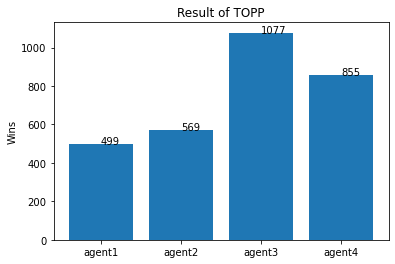

In [52]:
x = ['agent'+str(i+1) for i in range(len(agents))]
y = [result[agents[i]] for i in range(len(agents))]
plt.bar(x,y)
for index, value in enumerate(y):
    plt.text(index, value, str(value))
    
plt.ylabel('Wins')
plt.title("Result of TOPP")
plt.show()

## TOPP of pretrained models

In [5]:
agent2

In [13]:
def play(agent1, agent2, env):
    
    while env.get_winner() == 0:
        if env.current_player == 1:
            action = agent1.actor.get_action(env)
            
        else:
            action = agent2.actor.get_action(env)
        
        env.make_action(action)
        
            
        #env.display_board()
    winner = env.get_winner()
    env.reset()
    return winner

In [14]:
blue_winner = 0
red_winner = 0
for i in range(100):
    winner = play(agent1, agent2, hex)
    if winner == 1:
        blue_winner += 1
    elif winner == 2:
        red_winner += 1
print("blue winner: {}".format(blue_winner))
print("red winner: {}".format(red_winner))

blue winner: 0
red winner: 100


In [4]:
def onclick(event, board):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    ix, iy = rotate_coordinate([ix,iy], -board.get_angle())
    ix, iy = round(ix), round(iy)
    action = (ix, iy)
    actions.append(action)
    board.make_action(action)
    board.display_board()
    fig.canvas.mpl_disconnect(connection)

def set_piece(board) -> List[Tuple[int, int]]:
    board = board.copy()
    global actions, connection, fig
    actions = []
    fig = plt.figure()
    connection = fig.canvas.mpl_connect('button_press_event', lambda event: onclick(event, board))
    
    board.display_board()
    
    plt.show()
    return actions

In [91]:
%matplotlib qt
action = set_piece(Hex((5,5)))


In [92]:
action

[(3, 1)]

In [19]:
%matplotlib qt
def man_vs_machine(player1, player2, env, n_simulations):
    current = player1
    if isinstance(player1, Agent):
        mcts = MCTS(player1.actor, env)
    else:
        mcts = MCTS(player2, env)
    
    while env.get_winner() == 0:
        env.display_board()
        if isinstance(current, Agent):
            distribution = mcts.search(n_simulations)
            # Choose action greedily
            action = max(distribution, key=distribution.get)
            mcts.set_new_root(action)
            
        else:
            #actions = set_piece(env)
            action = input("Enter move as int,int")
            action = action.split(',')
            action = (int(action[0]), int(action[1]))
            #action = actions[0]
            #plt.show()
            mcts.set_new_root(action)
            
        env.make_action(action)
        current = player1 if current != player1 else player2
    winner = env.get_winner()
    env.display_board()
    env.reset()
    return winner

hex = Hex((4,4))
man_vs_machine(agent1, "meg", hex, n_simulations=100)



KeyboardInterrupt: Interrupted by user

In [29]:
x = input("skirv:")

skirv:3,3


In [30]:

y = x.split(',')
(int(y[0]),int(y[1]))

(3, 3)

In [3]:
from tensorflow import keras as KER 
actor1 = Actor(learning_rate=0.01,
             epsilon=0.1,
             end_epsilon=0.1,
             nn_shape=(30,15,16),
             filters=(10,),
             kernel_sizes=((2,2),),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='softmax',
              nn_loss= 'categorical_crossentropy',
              encoder=encoder
             )
actor1.model = KER.models.load_model('model1.h5')

actor2 = Actor(learning_rate=0.01,
             epsilon=0.1,
             end_epsilon=0.1,
             nn_shape=(30,15,16),
             filters=(10,),
             kernel_sizes=((2,2),),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='softmax',
              nn_loss= 'categorical_crossentropy',
              encoder=encoder
             )
actor2.model = KER.models.load_model('model2.h5')


agent1 = Agent(actor1)
agent2 = Agent(actor2)

def play(agent1, agent2, env, n_simulations):
    mcts1 = MCTS(actor1, env)
    mcts2 = MCTS(actor2, env)
    
    while env.get_winner() == 0:
        if env.current_player == 1:
            distribution = mcts1.search(n_simulations)
            # Choose action greedily
            action = max(distribution, key=distribution.get)
            mcts1.set_new_root(action)
            mcts2.set_new_root(action)
            
        else:
            
            distribution = mcts2.search(n_simulations)
            
            # Choose action greedily
            action = max(distribution, key=distribution.get)
            mcts2.set_new_root(action)
            mcts1.set_new_root(action)
        
        env.make_action(action)
        
            
        #env.display_board()
    winner = env.get_winner()
    env.reset()
    return winner
    

OSError: SavedModel file does not exist at: model1.h5/{saved_model.pbtxt|saved_model.pb}

In [11]:
blue_vic = 0
vics = []
for i in range(20):
    print(i)
    vic = play(agent1, agent2, hex, 100)
    if vic == 1:
        blue_vic += 1
    vics.append(vic)
blue_vic

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


11

In [9]:
mcts = MCTS(env = hex, target_policy=agent2.actor)

In [14]:

%time mcts.search(100)

CPU times: user 4.33 s, sys: 112 ms, total: 4.44 s
Wall time: 4.23 s


{(1, 0): 0.023333333333333334,
 (0, 1): 0.060000000000000005,
 (0, 0): 0.04666666666666667,
 (3, 0): 0.16666666666666669,
 (2, 3): 0.09000000000000001,
 (0, 3): 0.006666666666666667,
 (2, 2): 0.006666666666666667,
 (2, 0): 0.07666666666666667,
 (3, 2): 0.08,
 (1, 3): 0.006666666666666667,
 (3, 3): 0.006666666666666667,
 (0, 2): 0.043333333333333335,
 (1, 1): 0.023333333333333334,
 (2, 1): 0.3066666666666667,
 (3, 1): 0.04,
 (1, 2): 0.016666666666666666}

In [58]:
data = np.asarray(Image.open(path))

In [59]:
data.shape

(575, 1024, 3)

In [54]:
import cProfile


In [47]:
encoder = HexEncoder(padding=2)

In [48]:
h = Hex((4,4))
h.set_encoder(encoder)
e = h.copy()
e.make_action((0,0))

In [49]:
actor = Actor(learning_rate=0.001,
             epsilon=0.0,
             end_epsilon=0.0,
             nn_shape=(64, 16),
             filters=(56,56),
             kernel_sizes=((3,3),(1,1)),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='softmax',
              nn_loss= 'categorical_crossentropy',
              encoder=encoder
             )
agent = Agent(actor=actor)

In [50]:
actor.get_actions([h,e])

[(3, 0), (3, 0)]

In [51]:
mcts = MCTS(agent.actor, h)

In [57]:
%time mcts.search(1000)

CPU times: user 7.34 s, sys: 57.8 ms, total: 7.39 s
Wall time: 7.59 s


{(2, 0): 0.8285714285714286,
 (0, 0): 0.011428571428571429,
 (1, 2): 0.011428571428571429,
 (2, 1): 0.011428571428571429,
 (2, 2): 0.011428571428571429,
 (1, 0): 0.011428571428571429,
 (1, 3): 0.011428571428571429,
 (3, 3): 0.011428571428571429,
 (3, 1): 0.011428571428571429,
 (0, 2): 0.011428571428571429,
 (3, 2): 0.011428571428571429,
 (1, 1): 0.011428571428571429,
 (0, 3): 0.011428571428571429,
 (2, 3): 0.011428571428571429,
 (3, 0): 0.011428571428571429,
 (0, 1): 0.011428571428571429}

In [13]:
cProfile.run('mcts.search(100)', sort='cumtime')

         8150594 function calls (8140946 primitive calls) in 10.730 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   10.774   10.774 {built-in method builtins.exec}
        1    0.000    0.000   10.774   10.774 <string>:1(<module>)
        1    0.000    0.000   10.774   10.774 monte_carlo_ts.py:160(search)
      100    0.001    0.000   10.774    0.108 monte_carlo_ts.py:152(perform_simulation)
      100    0.022    0.000   10.697    0.107 monte_carlo_ts.py:78(_rollout)
     1072    0.051    0.000   10.453    0.010 actor.py:59(get_action)
     1072    0.074    0.000    6.187    0.006 encoder.py:216(encode)
6432/1072    0.300    0.000    4.089    0.004 base_layer.py:901(__call__)
     4288    1.431    0.000    3.692    0.001 encoder.py:105(bridge_encoding)
     1072    0.013    0.000    3.571    0.003 sequential.py:354(call)
     1072    0.009    0.000    3.401    0.003 functional.py:406(call)
  

In [17]:
cProfile.run('mcts.search(100)', sort='cumtime')

         2871821 function calls (2863064 primitive calls) in 3.777 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    3.805    3.805 {built-in method builtins.exec}
        1    0.000    0.000    3.805    3.805 <string>:1(<module>)
        1    0.000    0.000    3.805    3.805 monte_carlo_ts.py:160(search)
      100    0.001    0.000    3.805    0.038 monte_carlo_ts.py:152(perform_simulation)
      100    0.011    0.000    3.569    0.036 monte_carlo_ts.py:78(_rollout)
      973    0.020    0.000    2.441    0.003 actor.py:59(get_action)
 5838/973    0.163    0.000    2.350    0.002 base_layer.py:901(__call__)
      973    0.008    0.000    2.039    0.002 sequential.py:354(call)
      973    0.005    0.000    1.938    0.002 functional.py:406(call)
      973    0.075    0.000    1.933    0.002 functional.py:516(_run_internal_graph)
16997/13105    0.025    0.000    0.822    0.000 dispatch.py:198(w

In [55]:
cProfile.run('mcts.search(100)', sort='cumtime')

         1658276 function calls in 1.349 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.360    1.360 {built-in method builtins.exec}
        1    0.000    0.000    1.360    1.360 <string>:1(<module>)
        1    0.000    0.000    1.360    1.360 monte_carlo_ts.py:178(search)
      100    0.001    0.000    1.359    0.014 monte_carlo_ts.py:166(perform_simulation)
      200    0.008    0.000    1.243    0.006 hex.py:84(copy)
      200    0.001    0.000    1.171    0.006 hex.py:74(set_encoder)
      200    0.011    0.000    1.170    0.006 encoder.py:248(encode)
     1200    0.046    0.000    0.788    0.001 encoder.py:118(bridge_encoding)
    77400    0.292    0.000    0.705    0.000 encoder.py:134(_coordinate_bridge_encoding)
      100    0.004    0.000    0.693    0.007 monte_carlo_ts.py:65(_expand)
      100    0.004    0.000    0.624    0.006 monte_carlo_ts.py:88(_rollout2)
      100    0.

In [10]:
cProfile.run('actor.get_action(h)', sort='cumtime')

         1468 function calls (1459 primitive calls) in 0.005 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.005    0.005 {built-in method builtins.exec}
        1    0.000    0.000    0.005    0.005 <string>:1(<module>)
        1    0.000    0.000    0.005    0.005 actor.py:59(get_action)
      6/1    0.000    0.000    0.005    0.005 base_layer.py:901(__call__)
        1    0.000    0.000    0.004    0.004 sequential.py:354(call)
        1    0.000    0.000    0.004    0.004 functional.py:406(call)
        1    0.000    0.000    0.004    0.004 functional.py:516(_run_internal_graph)
    16/12    0.000    0.000    0.002    0.000 dispatch.py:198(wrapper)
       14    0.001    0.000    0.001    0.000 {built-in method tensorflow.python._pywrap_tfe.TFE_Py_FastPathExecute}
        2    0.000    0.000    0.001    0.001 convolutional.py:244(call)
        2    0.000    0.000    0.001    0.000 core.

In [15]:
cProfile.run('encoder.encode(h)', sort='cumtime')

         5413 function calls in 0.004 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.004    0.004 {built-in method builtins.exec}
        1    0.000    0.000    0.004    0.004 <string>:1(<module>)
        1    0.000    0.000    0.004    0.004 encoder.py:216(encode)
        4    0.001    0.000    0.002    0.001 encoder.py:105(bridge_encoding)
        1    0.000    0.000    0.001    0.001 encoder.py:17(create_padded_env)
        1    0.000    0.000    0.001    0.001 hex.py:54(__init__)
        1    0.000    0.000    0.001    0.001 hexagonal_grid.py:98(__init__)
        1    0.000    0.000    0.001    0.001 hexagonal_grid.py:48(generate_neighbours)
     1424    0.001    0.000    0.001    0.000 hexagonal_grid.py:62(get_cell)
       44    0.000    0.000    0.000    0.000 encoder.py:158(_process_save_endpoint)
       44    0.000    0.000    0.000    0.000 encoder.py:50(get_carrier_points)
     

In [21]:
actor = Actor(learning_rate=0.001,
             epsilon=0.25,
             end_epsilon=0.05,
             nn_shape=(155,128,25),
             filters=(128, 128, 64),
             kernel_sizes=((5,5),(3,3),(1,1)),
                nn_opt='Adam',
              nn_activation='relu',
              nn_last_activation='softmax',
              nn_loss= 'categorical_crossentropy',
              encoder=encoder
             )

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

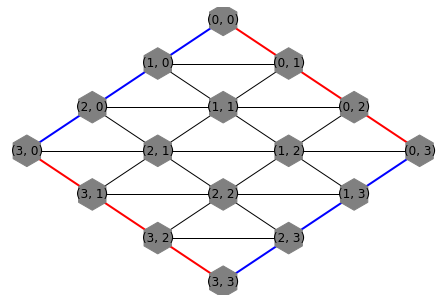

In [22]:
h = Hex((4,4))
h.display_board()

In [23]:
encoder = HexEncoder(padding=2)

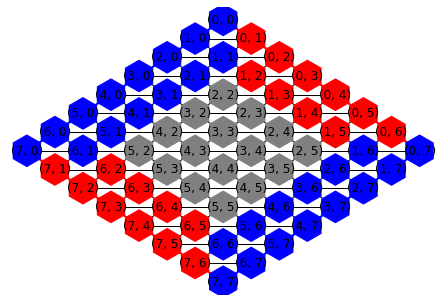

In [24]:
encoder.create_padded_env(h, padding=2).display_board()

In [27]:
h.set_encoder(encoder)

In [28]:
encoder.planes['form_bridge_blue']

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [29]:
h.make_action((1,1))

Shapes:  [(8, 8), (8, 8), (8, 8), (8, 8), (8, 8), (8, 8), (8, 8), (8, 8), (8, 8)]


In [30]:
encoder.planes['form_bridge_blue']

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [32]:
encoder.planes['form_bridge_red']

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [7]:
cProfile.run('mcts.search(100)', sort='cumtime')

         1418538 function calls (1412304 primitive calls) in 2.121 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    2.121    2.121 {built-in method builtins.exec}
        1    0.000    0.000    2.121    2.121 <string>:1(<module>)
        1    0.000    0.000    2.121    2.121 monte_carlo_ts.py:160(search)
      100    0.001    0.000    2.121    0.021 monte_carlo_ts.py:152(perform_simulation)
      100    0.009    0.000    2.027    0.020 monte_carlo_ts.py:78(_rollout)
     1039    0.019    0.000    1.716    0.002 actor.py:59(get_action)
4156/1039    0.114    0.000    1.628    0.002 base_layer.py:901(__call__)
     1039    0.010    0.000    1.341    0.001 sequential.py:354(call)
     1039    0.005    0.000    1.242    0.001 functional.py:406(call)
     1039    0.055    0.000    1.237    0.001 functional.py:516(_run_internal_graph)
     3117    0.008    0.000    0.640    0.000 core.py:1206(call)
